# Importing Dataset and Making some simple Data Analysis-Plots

---

## Importing Basic Libraries

> Clustering all packages used in the first code chunk



In [1]:
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.io as pio
import plotly.graph_objects as go

In [ ]:
!pip install -U kaleido

## Importing Dataset

In [2]:
df = pd.read_excel('12.xlsx')

## Dataset Glance

In [ ]:
df.head()

,Code,Time (Month),Free_Acidity (% oleic acid),Peroxide_Value (mEqO2/Kg olive oil),K232,K268,Oxidative_Stability (h),TPC (mg galic acid/Kg olive oil),DPPH (%inhibition),1_Penten_3_one,...,G_Dry fruits,G_Banana,G_Fresh Herbs,G_Tomate leave,G_Hay,G_Cabbage,G_Olive leave,G_Rancid,Complexity,Persistence
0,C,0,0.23,3.33,1.95,0.15,13.68,556.59,53.95,1.94,...,4.4,0.0,5.9,3.8,0.0,7.1,6.5,0.0,7.3,9.5
1,C,0,0.17,4.16,2.05,0.15,13.58,572.31,52.96,3.94,...,4.0,0.0,5.9,4.2,0.0,7.0,5.7,0.0,7.4,9.3
2,C,0,0.23,3.33,1.84,0.15,13.49,537.57,51.68,2.97,...,3.7,0.0,5.6,3.9,0.0,6.9,5.1,0.0,7.4,8.5
3,C,0,0.17,3.33,1.79,0.15,13.65,538.49,51.34,1.92,...,3.6,0.0,5.2,3.1,0.0,6.9,4.9,0.0,6.7,9.4
4,C,0,0.17,3.33,2.04,0.15,13.65,522.41,52.67,1.86,...,3.5,0.0,5.8,3.9,0.0,7.5,5.1,0.0,6.7,9.3


In [ ]:
df.shape

(252, 90)

### Subsets and Plot Time Series

In [ ]:
dpph = df[['Code', 'Time (Month)', 'DPPH (%inhibition)']]
dpph.head()

,Code,Time (Month),DPPH (%inhibition)
0,C,0,53.95
1,C,0,52.96
2,C,0,51.68
3,C,0,51.34
4,C,0,52.67


#### Averaging Categorical Variables

In [ ]:
dpph_avg = dpph.groupby(['Code', 'Time (Month)']).mean().reset_index()
dpph_avg.head()

,Code,Time (Month),DPPH (%inhibition)
0,A,0,23.335000
1,A,2,25.911667
2,A,4,22.393333
3,A,6,24.400000
4,A,8,23.761667


#### Time Series Plotting

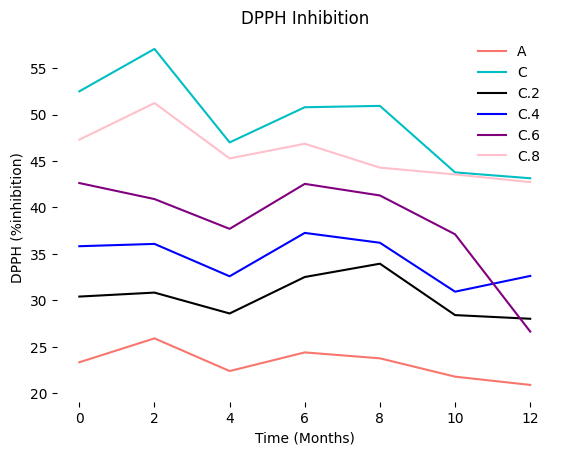

In [ ]:
fig, ax = plt.subplots()
colors = ['#F8766D', '#00BFC4', 'black', 'blue', 'purple', 'pink']
for i, code in enumerate(dpph_avg['Code'].unique()):
    subset_by_code = dpph_avg[dpph_avg['Code'] == code]
    ax.plot(subset_by_code['Time (Month)'], subset_by_code['DPPH (%inhibition)'], label=code, color=colors[i % len(colors)])
ax.set_xlabel('Time (Months)')
ax.set_ylabel('DPPH (%inhibition)')
ax.set_title('DPPH Inhibition')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
legend = ax.legend()
legend.get_frame().set_linewidth(0)
plt.savefig('dpph.png', dpi=300)
plt.show()

## Parallel Ploting

---

### Data Wrangling

In [ ]:
pcp = df
pcp.dtypes

Code                                    object
Time (Month)                             int64
Free_Acidity (% oleic acid)            float64
Peroxide_Value (mEqO2/Kg olive oil)    float64
K232                                   float64
                                        ...   
G_Cabbage                              float64
G_Olive leave                          float64
G_Rancid                               float64
Complexity                             float64
Persistence                            float64
Length: 90, dtype: object

In [ ]:
pcp['Code'].unique()

array(['C', 'A', 'C.8', 'C.6', 'C.4', 'C.2'], dtype=object)

In [ ]:
replacements = {
    'C': 100,
    'A': 0,
    'C.8': 80,
    'C.6': 60,
    'C.4': 40,
    'C.2': 20,
}

pcp['Code'].replace(replacements, inplace=True)

pcp['Code'] = pcp['Code'].astype('float64')

pcp.rename(columns={'Code': '% Cob'}, inplace=True)

### Plot data Prep

In [ ]:
columns_to_plot = ['% Cob', 'Oxidative_Stability (h)', 'TPC (mg galic acid/Kg olive oil)', 'DPPH (%inhibition)', 'Peroxide_Value (mEqO2/Kg olive oil)']

In [ ]:
labels = {'% Cob': '% Cob', 'Oxidative_Stability (h)': 'Oxidative Stability', 'TPC (mg galic acid/Kg olive oil)':'TPC', 'DPPH (%inhibition)':'% Inhibition', 'Peroxide_Value (mEqO2/Kg olive oil)': 'Peroxide Value'}

#### Parallel C Plotting

In [ ]:
fig = px.parallel_coordinates(
    pcp,
    dimensions=columns_to_plot,
    width=1400, height=600,
    labels=labels if labels else None,
    color='% Cob',  # Optional coloring by factor column
    color_continuous_scale=[(0, "rgb(248,118,109)"), (1, "rgb(42,191,196)")],
)
fig.show()

In [ ]:
fig.write_image("parallel_coordinates.png")
# If this fails run !pip install -U kaleido, Restart run time and run everythin but "!pip install -U" again

## Correlation Matrix

Compute pairwise correlation of columns


### Subset Preparation for Correlation Matrix

In [3]:
qual_corr = df[['Free_Acidity (% oleic acid)',
                'Peroxide_Value (mEqO2/Kg olive oil)',
                'K232',
                'K268',
                'Oxidative_Stability (h)',
                'TPC (mg galic acid/Kg olive oil)',
                'DPPH (%inhibition)']]

qual_corr.rename(columns={'Free_Acidity (% oleic acid)': 'Acidity',
                          'Peroxide_Value (mEqO2/Kg olive oil)':'Peroxide',
                          'Oxidative_Stability (h)': 'Ox_Stability',
                          'TPC (mg galic acid/Kg olive oil)':'TPC',
                          'DPPH (%inhibition)':'DPPH'},
                 inplace=True)


# Calculate the correlation matrix
corr_matrix = qual_corr.corr()
corr_matrix.head()

<ipython-input-3-2481c0a16823>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual_corr.rename(columns={'Free_Acidity (% oleic acid)': 'Acidity',


,Acidity,Peroxide,K232,K268,Ox_Stability,TPC,DPPH
Acidity,1.000000,0.398280,0.191344,0.106942,-0.028026,-0.080159,0.046206
Peroxide,0.398280,1.000000,0.728281,0.162947,-0.554479,-0.514814,-0.450975
K232,0.191344,0.728281,1.000000,0.293471,-0.586735,-0.488144,-0.496734
K268,0.106942,0.162947,0.293471,1.000000,0.208748,0.339652,0.272011
Ox_Stability,-0.028026,-0.554479,-0.586735,0.208748,1.000000,0.904386,0.907245


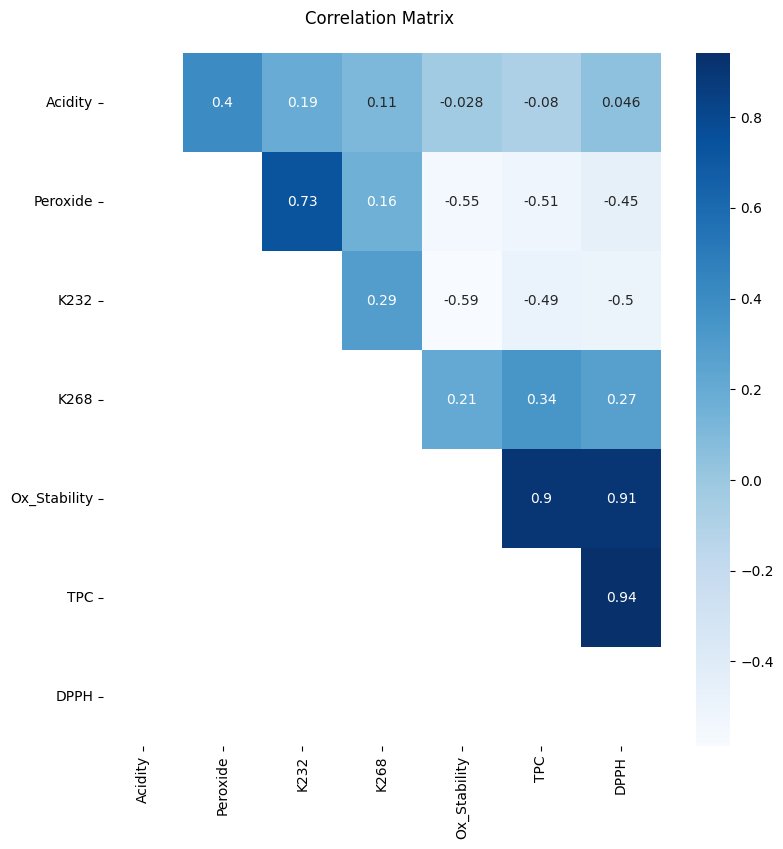

In [4]:
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

corr = plt.figure(figsize=(9,9)) # ajusta el tamaño de la figura
hm = sns.heatmap(corr_matrix, mask=mask, cmap="Blues", annot = True, annot_kws={"size": 10})
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=10)
hm.set_xticklabels(hm.get_yticklabels(), rotation=90, fontsize=10)
hm.set(title = "Correlation Matrix \n")
plt.savefig("correlation_matrix.png")

### Wrangling, Subsetting and Plotting Seaborn Jointplot

In [5]:
# Names for subsequent process
column_names = df.columns
print(column_names)

Index(['Code', 'Time (Month)', 'Free_Acidity (% oleic acid)',
       'Peroxide_Value (mEqO2/Kg olive oil)', 'K232', 'K268',
       'Oxidative_Stability (h)', 'TPC (mg galic acid/Kg olive oil)',
       'DPPH (%inhibition)', '1_Penten_3_one', '3_Pentanone', '1_Pentanol',
       '(E)_2_Pentenal', '(Z)_2_Penten_1_ol', '(Z)_3_Hexenal', '(E)_2_Hexenal',
       '(Z)_3_Hexen_1_ol', '(E)_2_Hexenol', '1_Hexanol', '2_Heptanone',
       '3_Ethyl_1,5_octadiene(IsomerI)', 'Heptanal', '(E,E)_2,4_Hexadienal',
       '(Z)_2_Pentenylacetate', '3_Ethyl_1,5_octadieneIsomerII',
       '3_Ethyl_1,5_octadieneIsomerIII', '(E)_2_Heptenal',
       '(E)_4_Oxohex_2_enal', '1_Heptanol', 'Hexanoic_acid',
       '6_methyl_5_Hepten_2_one', 'β_Myrcene', '(E,E)_2,4,Heptadienal',
       '4,8_dimethyl_1,7_Nonadiene', 'Decane', 'Octanal',
       '(Z)_3_hexenylacetate', 'Hexyl_ester_acetic_acid', 'D_Limonene',
       '2_ethyl_1_Hexanol', '3,3,6_trimethyl_1,5_Heptadien_4_one',
       'Phenylacetaldehyde', '(E)_β_Ocimene', '

In [6]:
corr_o_d = df[['Code', 'Time (Month)', 'Free_Acidity (% oleic acid)', 'DPPH (%inhibition)', 'Oxidative_Stability (h)', 'K268', 'K232', 'TPC (mg galic acid/Kg olive oil)', 'Peroxide_Value (mEqO2/Kg olive oil)']]
corr_o_d.head()

,Code,Time (Month),Free_Acidity (% oleic acid),DPPH (%inhibition),Oxidative_Stability (h),K268,K232,TPC (mg galic acid/Kg olive oil),Peroxide_Value (mEqO2/Kg olive oil)
0,C,0,0.23,53.95,13.68,0.15,1.95,556.59,3.33
1,C,0,0.17,52.96,13.58,0.15,2.05,572.31,4.16
2,C,0,0.23,51.68,13.49,0.15,1.84,537.57,3.33
3,C,0,0.17,51.34,13.65,0.15,1.79,538.49,3.33
4,C,0,0.17,52.67,13.65,0.15,2.04,522.41,3.33


#### JointPlots

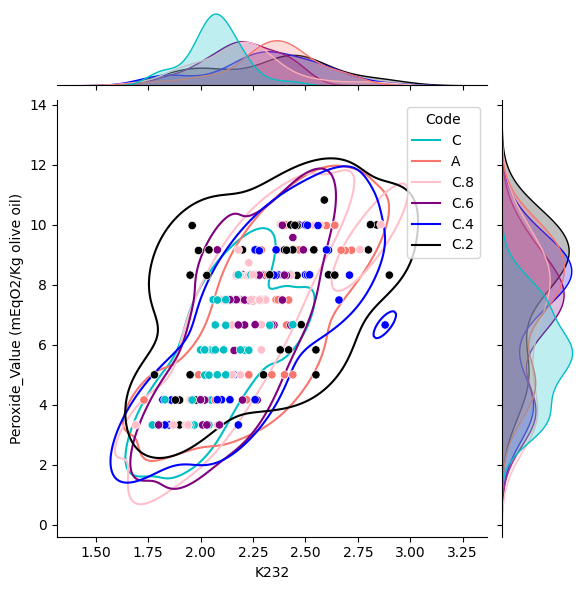

In [8]:
colors = ['#00BFC4', '#F8766D', 'pink', 'purple', 'blue','black']
g= sns.jointplot(data=corr_o_d, x='K232', y='Peroxide_Value (mEqO2/Kg olive oil)', hue="Code", palette=colors)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=1)
g.savefig('Per_k232.png', dpi=300)